# View Models
- Alejandro Hohmann
- Bhanu Muvva
- Chunxia Tong

The purpose of this notebook is to examine outputs from the multiple models that were created by the various Neural Networks.

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')
import seaborn as sns

In [2]:
#intialize values
seed=27
data_dir = '../../data/'
model_dir = '../../app/model/'

# open the parameters json
file_path = "model_parameters.json"
with open(model_dir + file_path) as model_params:
    model_params = json.load(model_params)

models = list(model_params.keys())
# sorted(models)


#
#create df with all keys(ignoreing performance summary as it is nested)
#

base_dict = {}
final_dict = {}
ignore_list = 'performance_sumamry'
i=0;
for k in model_params:
    base_dict={}
    for k2 in model_params[k]:
        if k2 not in 'performance_summary':
            base_dict[k2]=model_params[k][k2]        
        final_dict[k]=base_dict

df = pd.DataFrame.from_dict(final_dict,orient='index')

#
#create a new df with the performance summary alone
#

psummary_dict = {}
for k in model_params:
    psummary_dict[k] = model_params[k]['performance_summary']

psummary_df = pd.DataFrame.from_dict(psummary_dict,orient='index')    

# join the 2 df's
final_df = df.join(psummary_df)

#select the cols with numeric values only to compare metrics ( so exclude features and weights )
summary_cols = [x for x in final_df.columns if x not in ['features','weights']]

#print and check the df
performance_df = final_df[summary_cols].sort_index()
performance_df

,hidden_size,lr,dropout_rate,epochs,model_class,grid_search_metric,train_loss,val_loss,train_accuracy,test_accuracy,test_precision,test_recall,test_f1_score,test_auc
OneLayer_1000_epochs_optimized_recall_score,10,0.0001,0.20,1000,OneLayer,recall_score,0.494871,0.504961,0.773490,0.745387,0.208333,0.090909,0.126582,0.729209
OneLayer_100_epochs_optimized_roc_auc_score,500,0.0100,0.05,100,OneLayer,roc_auc_score,0.160787,0.436307,0.936242,0.856089,0.642857,0.654545,0.648649,0.884933
OneLayer_250_epochs_optimized_roc_auc_score,500,0.0100,0.15,250,OneLayer,roc_auc_score,0.109946,0.514772,0.959732,0.845018,0.627451,0.581818,0.603774,0.892677
OneLayer_500_epochs_optimized_roc_auc_score,250,0.0100,0.20,500,OneLayer,roc_auc_score,0.105076,0.518428,0.961409,0.845018,0.627451,0.581818,0.603774,0.900253
OneLayer_750_epochs_optimized_roc_auc_score,250,0.0100,0.15,750,OneLayer,roc_auc_score,0.122015,0.437214,0.952181,0.870849,0.708333,0.618182,0.660194,0.909259
ThreeLayer_1000_epochs_optimized_recall_score,10,0.0001,0.20,1000,ThreeLayer,recall_score,0.465518,0.456387,0.786074,0.797048,0.000000,0.000000,0.000000,0.795034
ThreeLayer_100_epochs_optimized_f1_score,250,0.0100,0.10,100,ThreeLayer,f1_score,0.095807,0.708236,0.958893,0.837638,0.603774,0.581818,0.592593,0.869613
ThreeLayer_250_epochs_optimized_f1_score,250,0.0100,0.05,250,ThreeLayer,f1_score,0.019344,2.105474,0.994966,0.859779,0.666667,0.618182,0.641509,0.896002
ThreeLayer_250_epochs_optimized_roc_auc_score,100,0.0100,0.15,250,ThreeLayer,roc_auc_score,0.042090,1.142197,0.989094,0.852399,0.647059,0.600000,0.622642,0.896128
ThreeLayer_500_epochs_optimized_roc_auc_score,250,0.0100,0.05,500,ThreeLayer,roc_auc_score,0.020326,1.864025,0.991611,0.885609,0.722222,0.709091,0.715596,0.922685


In [54]:
metrics = [
    'test_accuracy',
    'test_precision',
    'test_recall',
    'test_f1_score',
    'test_auc'
]
idx = 4
print(metrics[idx])

performance_df.sort_values(by=metrics[idx], ascending=False)

test_auc


,hidden_size,lr,dropout_rate,epochs,model_class,grid_search_metric,train_loss,val_loss,train_accuracy,test_accuracy,test_precision,test_recall,test_f1_score,test_auc
ThreeLayer_500_epochs_optimized_roc_auc_score,250,0.0100000,0.0500000,500,ThreeLayer,roc_auc_score,0.0203263,1.8640250,0.9916107,0.8856089,0.7222222,0.7090909,0.7155963,0.9226852
TwoLayer_250_epochs_optimized_roc_auc_score,250,0.0100000,0.2000000,250,TwoLayer,roc_auc_score,0.1100651,0.7525712,0.9505034,0.8745387,0.7142857,0.6363636,0.6730769,0.9216751
TwoLayer_750_epochs_optimized_roc_auc_score,100,0.0100000,0.2000000,750,TwoLayer,roc_auc_score,0.0325475,0.8078681,0.9899329,0.8597786,0.6666667,0.6181818,0.6415094,0.9136364
TwoLayer_100_epochs_optimized_roc_auc_score,500,0.0100000,0.0500000,100,TwoLayer,roc_auc_score,0.1446602,0.7158454,0.9395973,0.8671587,0.6792453,0.6545455,0.6666667,0.9128788
ThreeLayer_750_epochs_optimized_roc_auc_score,100,0.0100000,0.2000000,750,ThreeLayer,roc_auc_score,0.0170232,1.2795470,0.9932886,0.8671587,0.6938776,0.6181818,0.6538462,0.9114057
OneLayer_750_epochs_optimized_roc_auc_score,250,0.0100000,0.1500000,750,OneLayer,roc_auc_score,0.1220149,0.4372137,0.9521812,0.8708487,0.7083333,0.6181818,0.6601942,0.9092593
OneLayer_500_epochs_optimized_roc_auc_score,250,0.0100000,0.2000000,500,OneLayer,roc_auc_score,0.1050764,0.5184278,0.9614094,0.8450185,0.6274510,0.5818182,0.6037736,0.9002525
ThreeLayer_250_epochs_optimized_roc_auc_score,100,0.0100000,0.1500000,250,ThreeLayer,roc_auc_score,0.0420898,1.1421973,0.9890940,0.8523985,0.6470588,0.6000000,0.6226415,0.8961279
ThreeLayer_250_epochs_optimized_f1_score,250,0.0100000,0.0500000,250,ThreeLayer,f1_score,0.0193442,2.1054745,0.9949664,0.8597786,0.6666667,0.6181818,0.6415094,0.8960017
TwoLayer_500_epochs_optimized_roc_auc_score,500,0.0100000,0.1000000,500,TwoLayer,roc_auc_score,0.0189185,2.0523396,0.9924497,0.8634686,0.6800000,0.6181818,0.6476190,0.8946970


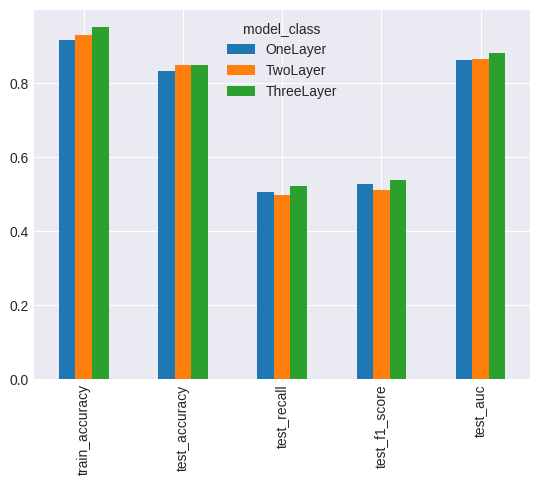

In [4]:
cols = [
    'model_class',
    'train_accuracy',
    'test_accuracy',
    'test_recall',
    'test_f1_score',
    'test_auc'
]

class_order = ['OneLayer', 'TwoLayer', 'ThreeLayer']

class_avg = performance_df[cols].groupby(['model_class']).mean()
class_avg = class_avg.loc[class_order,:]
class_avg.T.plot(kind='bar');

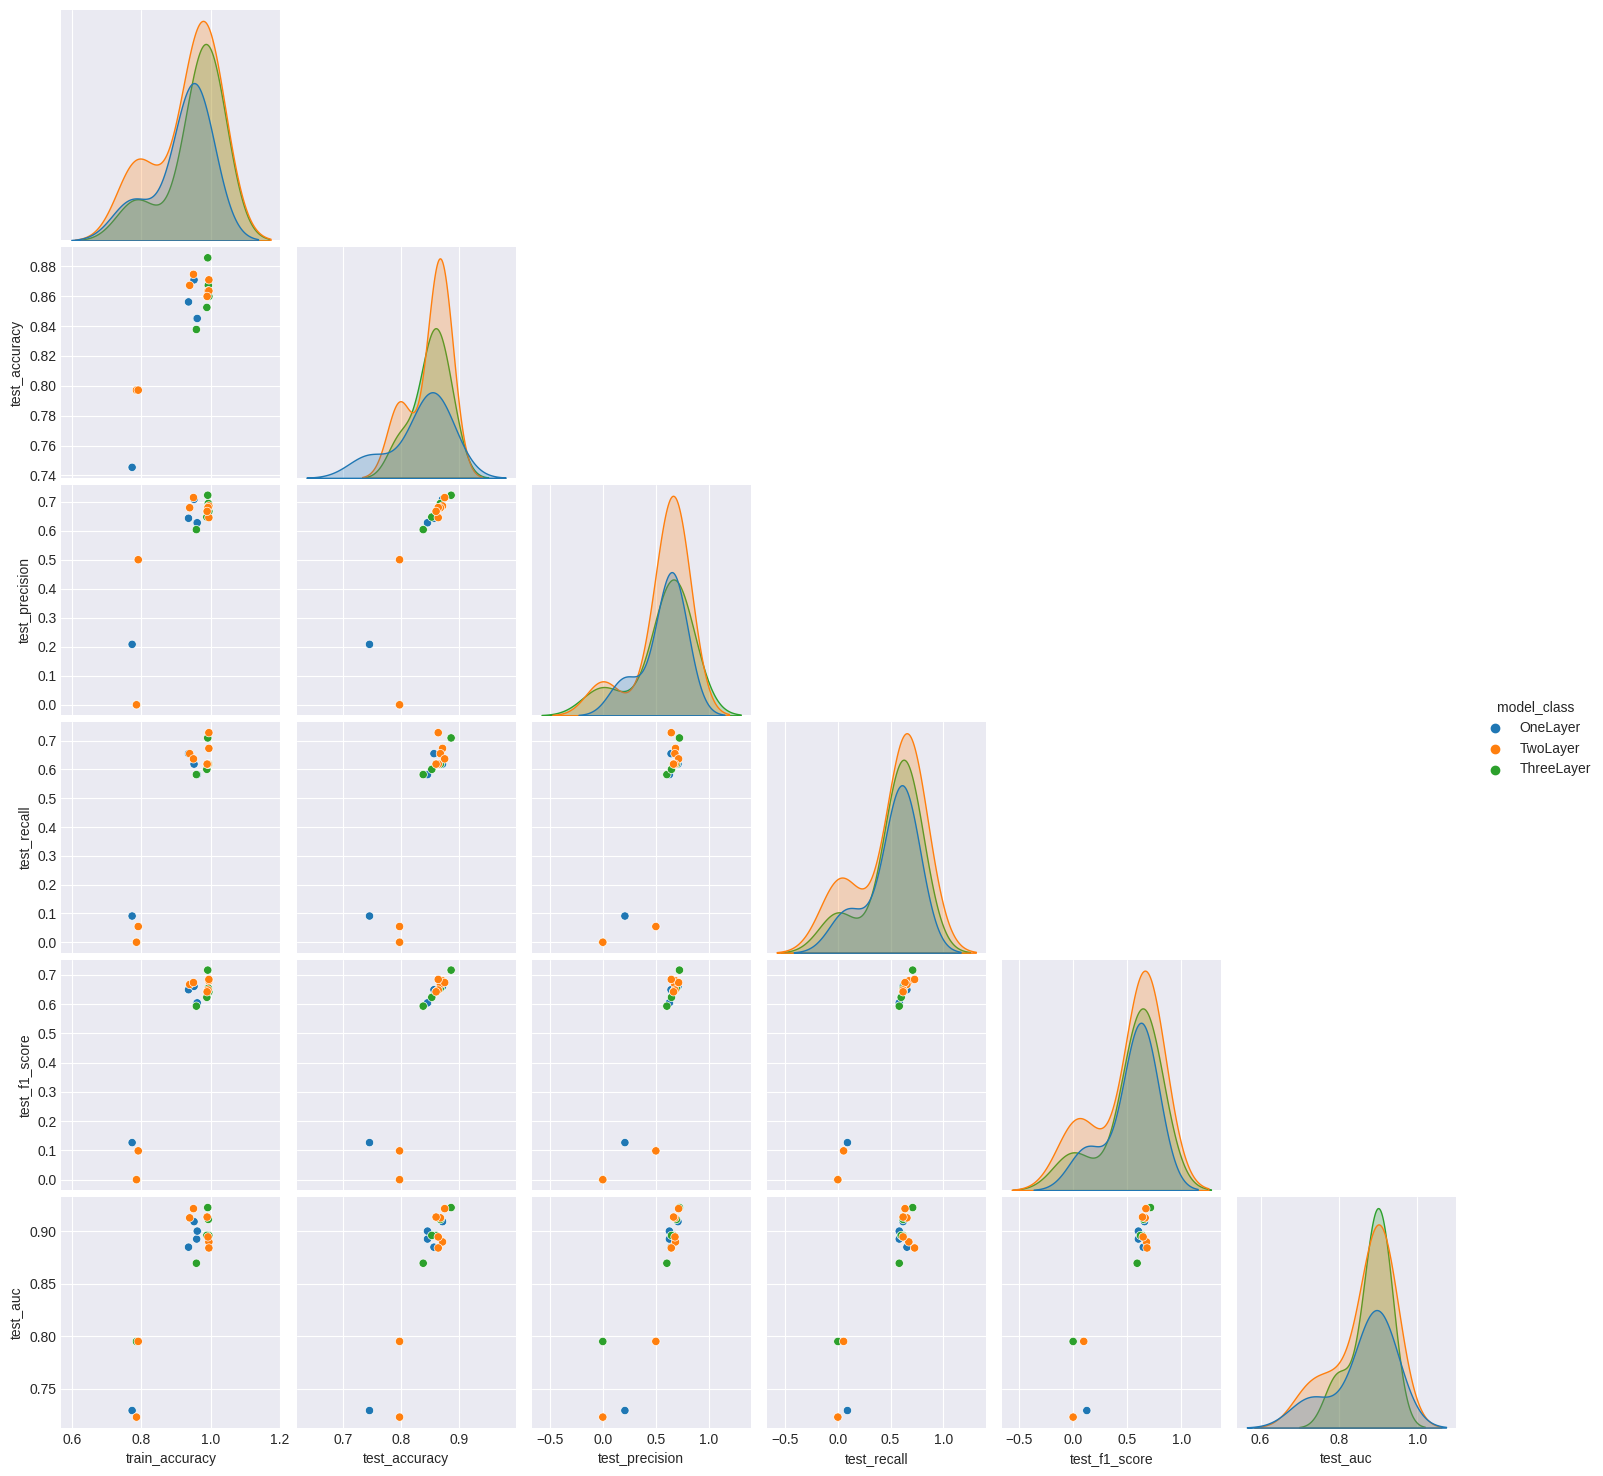

In [5]:
cols = [
    'model_class',
    'train_accuracy',
    'test_accuracy',
    'test_precision',
    'test_recall',
    'test_f1_score',
    'test_auc'
]

sns.pairplot(performance_df[cols], 
             hue='model_class', 
             hue_order=class_order,
             corner=True
            );

# view model predictions

In [6]:
import numpy as np
import pickle
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
import torch
# load in the model class
from sys import path
path.append(model_dir)
import ModelNN as Net

from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

In [7]:
pd.set_option('display.float_format', lambda x: '%.7f' % x)

In [8]:
torch.cuda.device_count()

4

In [9]:
device_0 = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device_1 = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
device_2 = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
device_3 = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")

devices = [
    device_0,
    device_1,
    device_2,
    device_3,
]

idx = 0
device = devices[idx]
device

device(type='cuda', index=0)

In [10]:
# use whichever model name desired

#layers = 'One'
layers = 'Two'
#layers = 'Three'

compare = [
    f'{layers}Layer_250_epochs_optimized_roc_auc_score',
    f'{layers}Layer_500_epochs_optimized_roc_auc_score',
    f'{layers}Layer_750_epochs_optimized_roc_auc_score',
    f'{layers}Layer_750_epochs_optimized_recall_score',
    
    
]

idx = 0

architecture = compare[idx]
one_model = model_params[architecture]
one_model

{'features': ['peak_i15_mmh',
  'fire_interval',
  'SuscFrac',
  'SAV',
  'kf',
  'prophm23',
  'SedUn'],
 'hidden_size': 250,
 'lr': 0.01,
 'dropout_rate': 0.2,
 'epochs': 250,
 'model_class': 'TwoLayer',
 'weights': 'TwoLayer_250_epochs_optimized_roc_auc_score.pth',
 'grid_search_metric': 'roc_auc_score',
 'performance_summary': {'train_loss': 0.11006508022546768,
  'val_loss': 0.752571165561676,
  'train_accuracy': 0.950503355704698,
  'test_accuracy': 0.8745387453874539,
  'test_precision': 0.7142857142857143,
  'test_recall': 0.6363636363636364,
  'test_f1_score': 0.673076923076923,
  'test_auc': 0.9216750841750843}}

In [11]:
performance_df.loc[compare,:].T

,TwoLayer_250_epochs_optimized_roc_auc_score,TwoLayer_500_epochs_optimized_roc_auc_score,TwoLayer_750_epochs_optimized_roc_auc_score,TwoLayer_750_epochs_optimized_recall_score
hidden_size,250,500,100,100
lr,0.0100000,0.0100000,0.0100000,0.0100000
dropout_rate,0.2000000,0.1000000,0.2000000,0.0500000
epochs,250,500,750,750
model_class,TwoLayer,TwoLayer,TwoLayer,TwoLayer
grid_search_metric,roc_auc_score,roc_auc_score,roc_auc_score,recall_score
train_loss,0.1100651,0.0189185,0.0325475,0.0117989
val_loss,0.7525712,2.0523396,0.8078681,2.1628008
train_accuracy,0.9505034,0.9924497,0.9899329,0.9949664
test_accuracy,0.8745387,0.8634686,0.8597786,0.8634686


In [12]:
# should turn this into a function


input_size = len(one_model['features'])
hidden_size = one_model['hidden_size']
dropout_rate = one_model['dropout_rate']
output_size = 1


# this is not programmatic
# it isn't getting passed in
model_class = one_model['model_class']
features = one_model['features']
# load trained model weights
weights = one_model['weights']


# instantiate model
with torch.no_grad(): # turn off gradiants for inference
    if model_class == 'OneLayer':
        model = Net.OneLayer(input_size, hidden_size, output_size, dropout_rate).to(device)
    elif model_class == 'TwoLayer':
        model = Net.TwoLayer(input_size, hidden_size, output_size, dropout_rate).to(device)
    elif model_class == 'ThreeLayer':
        model = Net.ThreeLayer(input_size, hidden_size, output_size, dropout_rate).to(device)
    model.eval() # turn off dropout etc for inference
    
# load weights
model.load_state_dict(torch.load(model_dir + weights, map_location=device))

<All keys matched successfully>

In [34]:
# LOAD IN DATA
X_train_df, X_test_df, y_train_df, y_test_df = pickle.load(open(data_dir + "train_test_data.pkl", "rb"))
X_train_df, X_test_df = X_train_df[features], X_test_df[features]

# scale on the training set
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train_df))
X_test_scaled = pd.DataFrame(sc.transform(X_test_df))

# could also do the whole dataset
# want to examine just the test predictions now
X_test_tensor = torch.tensor(X_test_scaled.values).float().to(device)
y_test_pred_proba = model(X_test_tensor) # already sent to device when instantiated
y_test_pred_proba = y_test_pred_proba.detach().cpu().numpy().astype(np.float16) # smaller dtype
y_test_pred_bool = np.round(y_test_pred_proba)



# additional data for full proba analysis
rain_scaler_mean = X_train_df['peak_i15_mmh'].mean()
rain_scaler_std = X_train_df['peak_i15_mmh'].std()
# now load in all the data
site_data = gpd.read_parquet(data_dir + "sites_v02_plot_data.parquet")
# need for replacing data in scaled df at inference
col_idx = site_data[features].columns.get_loc('peak_i15_mmh')
# fit the entire dataset to the scaler
X_scaled = pd.DataFrame(sc.transform(site_data[features]))

In [35]:
def make_prediction(df, rain_input):
    rain = pd.to_numeric(np.repeat(rain_input, df.shape[0]))
    rain_scaled = (rain - rain_scaler_mean) / rain_scaler_std
    # now replace with the scaled input
    X_scaled.loc[:,col_idx] = rain_scaled
    
    # and make prediction with the new rain amount
    X_scaled_tensor = torch.tensor(X_scaled.values).float().to(device)
    y_pred_tensor = model(X_scaled_tensor) # already sent to device when instantiated
    # predicted probability
    y_pred_proba = y_pred_tensor.detach().cpu().numpy().astype(np.float16) # smaller dtype
    # in case you want the binary output
    #y_pred_bool = np.round(y_pred_proba)
    
    return y_pred_proba

In [36]:
architecture

'TwoLayer_250_epochs_optimized_roc_auc_score'

In [37]:
sum(make_prediction(site_data, 16) == 1)

array([0])

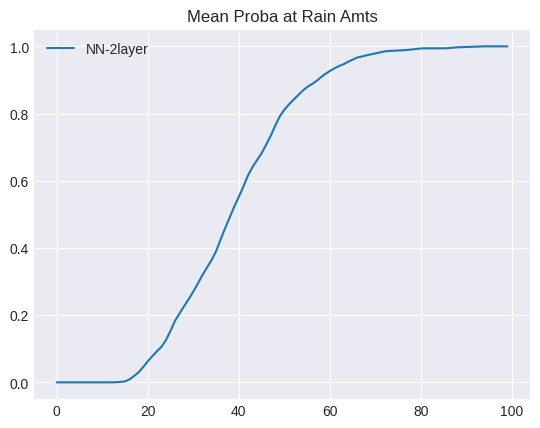

In [46]:
pred_df = pd.DataFrame(columns=['proba'])
#col_name = 'epochs_' + str(one_model['epochs'])

for i in range(100):
    pred_df.loc[i, col_name] = make_prediction(site_data, i).mean()

pred_df = pred_df.rename(columns={'epochs_250': 'NN-2layer'})
pred_df = pred_df.drop(['proba'], axis=1)
    
#pred_df.plot(title=f'{architecture} \n Mean Proba at Rain Amts');
pred_df.plot(title=f'Mean Proba at Rain Amts');

In [62]:
# plot with staley

In [47]:
from sklearn.linear_model import LogisticRegression
# # LOAD IN DATA
# X_train_df, X_test_df, y_train_df, y_test_df = pickle.load(open("../../data/train_test_data.pkl", "rb"))
# #scale the data X_train and X_test
# cols = X_train_df.columns
# sc = StandardScaler()
# X_train_df = pd.DataFrame(sc.fit_transform(X_train_df), columns=cols)
# X_test_df = pd.DataFrame(sc.transform(X_test_df), columns=cols)
# instantiate and fit model on training data
clf = LogisticRegression(random_state=seed, penalty='l2').fit(X_train_scaled, y_train_df)

# # predict training data bool
# y_train_pred_proba = clf.predict_proba(X_train_df)
# # it returns the proba complents so get get proba of 1
# y_train_pred_proba = pd.DataFrame(y_train_pred_proba)[1]
# # predict testing data bool
# y_test_pred_proba = clf.predict_proba(X_test_df)
# # it returns the proba complents so get get proba of 1
# y_test_pred_proba = pd.DataFrame(y_test_pred_proba)[1]

# # predict training data bool
# y_train_pred_bool = clf.predict(X_train_df)
# # predict testing data bool
# y_test_pred_bool = clf.predict(X_test_df)

In [48]:
def make_prediction_logreg(df, rain_input):
    rain = pd.to_numeric(np.repeat(rain_input, df.shape[0]))
    rain_scaled = (rain - rain_scaler_mean) / rain_scaler_std
    # now replace with the scaled input
    X_scaled.loc[:,col_idx] = rain_scaled
    
    # and make prediction with the new rain amount
    #y_pred_tensor = clf.predict(X_scaled) 
    # predicted probability
    y_pred_proba = clf.predict_proba(X_scaled) 
    # in case you want the binary output
    #y_pred_bool = np.round(y_pred_proba)
    y_pred_proba = pd.DataFrame(y_pred_proba)[1]
    
    return y_pred_proba

In [49]:
for i in range(100):
    pred_df.loc[i, 'staley'] = make_prediction_logreg(site_data, i).mean()

pred_df

,NN-2layer,staley
0,0.0000000,0.0405184
1,0.0000000,0.0422030
2,0.0000000,0.0439527
3,0.0000000,0.0457697
4,0.0000000,0.0476561
...,...,...
95,1.0000000,0.6497086
96,1.0000000,0.6584175
97,1.0000000,0.6670308
98,1.0000000,0.6755444


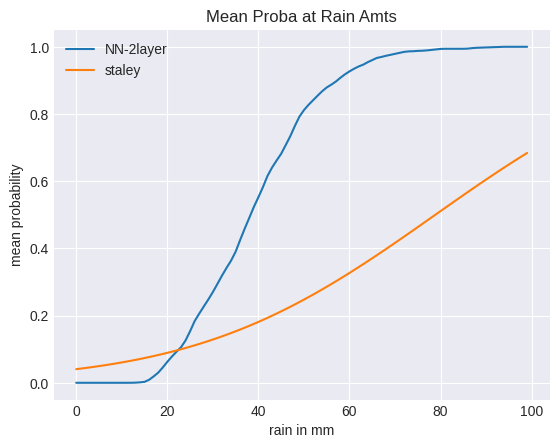

In [53]:
pred_df.plot(title=f'Mean Proba at Rain Amts')
plt.xlabel('rain in mm')
plt.ylabel('mean probability');

In [29]:
# pred_df = pd.DataFrame()

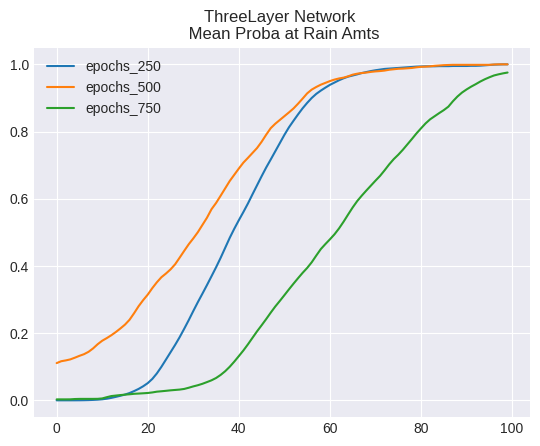

In [629]:
# pred_df = pd.DataFrame(columns=['proba'])
col_name = 'epochs_' + str(one_model['epochs'])

for i in range(100):
    pred_df.loc[i, col_name] = make_prediction(site_data, i).mean()


#pred_df.plot(title=f'{architecture} \n Mean Proba at Rain Amts');
pred_df.plot(title=f'{model_class} Network \n Mean Proba at Rain Amts');

In [630]:
# pred_df

In [631]:
# pred_df = pd.DataFrame(columns=['proba'])
# for i in range(100):
#     pred_df.loc[i, 'proba'] = np.median(make_prediction(site_data, i))

# pred_df.plot(title=f'{architecture} \n Median Proba at Rain Amts');

In [632]:
# around this point it switches
pred_df.loc[45:55]

,epochs_250,epochs_500,epochs_750
45,0.6669922,0.7695312,0.2233887
46,0.6928711,0.7905273,0.2418213
47,0.7167969,0.8100586,0.2609863
48,0.7412109,0.8232422,0.2792969
49,0.7656250,0.8344727,0.2958984
50,0.7900391,0.8457031,0.3129883
51,0.8125000,0.8569336,0.3303223
52,0.8320312,0.8686523,0.3471680
53,0.8510742,0.8828125,0.3635254
54,0.8691406,0.8979492,0.3793945


In [633]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [634]:
# bring in full file
# will need for geographic assessment of confusion matrix
file_path = "data_v08_consolidated.parquet"
df = gpd.read_parquet(data_dir + file_path)

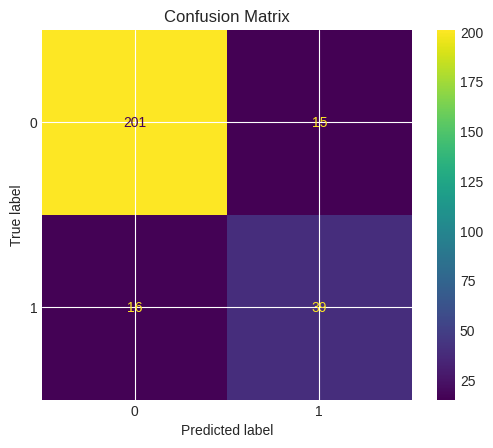

In [635]:
cm = confusion_matrix(y_test_df, y_test_pred_bool)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();
plt.title('Confusion Matrix');

In [636]:
# create dataframe with test values
test_assess = pd.DataFrame(y_test_df).astype(int).rename(columns={'response': 'y_test'})
# predicted values
test_assess['y_test_pred'] = y_test_pred_bool.flatten().astype(int)
# whether they are correctly predicted
test_assess['pred_correct'] = test_assess['y_test'] == test_assess['y_test_pred']
# the probability of the prediction
test_assess['y_test_pred_proba'] = y_test_pred_proba.flatten()

# precision of probas causing downstream errors
# truncate to something reasonable
test_assess['y_test_pred_proba'] = test_assess['y_test_pred_proba'].astype(str).str[:10].astype(np.float16)

# create column for confusion matrix
# we'll use this to assess the probabilities
# there's a dataframe for each of these if needed
TP = test_assess[(test_assess['y_test'] == 1) & (test_assess['pred_correct'] == True)]
FP = test_assess[(test_assess['y_test'] == 0) & (test_assess['pred_correct'] == False)]
TN = test_assess[(test_assess['y_test'] == 0) & (test_assess['pred_correct'] == True)]
FN = test_assess[(test_assess['y_test'] == 1) & (test_assess['pred_correct'] == False)]

test_assess.loc[TP.index,'confusion'] = 'TP'
test_assess.loc[FP.index,'confusion'] = 'FP'
test_assess.loc[TN.index,'confusion'] = 'TN'
test_assess.loc[FN.index,'confusion'] = 'FN'

# bring in the state values
test_assess = pd.merge(test_assess, df['state'], how='left', left_index=True, right_index=True)

test_assess

,y_test,y_test_pred,pred_correct,y_test_pred_proba,confusion,state
2,0,0,True,0.0000000,TN,CA
6,0,0,True,0.0000000,TN,CA
10,0,0,True,0.0000000,TN,CA
29,1,1,True,1.0000000,TP,ID
35,1,1,True,0.9965820,TP,ID
...,...,...,...,...,...,...
1446,0,0,True,0.0000000,TN,AZ
1447,0,0,True,0.0045319,TN,AZ
1448,0,0,True,0.0000244,TN,AZ
1449,0,0,True,0.0000000,TN,AZ


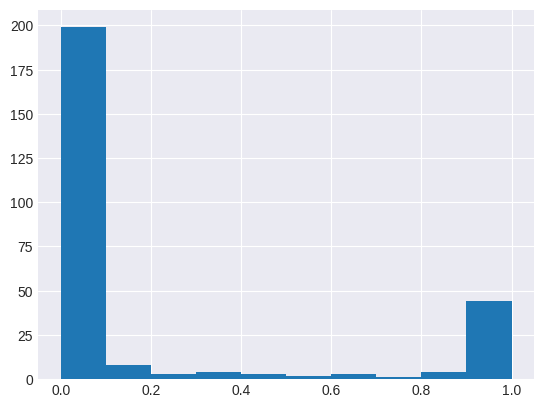

In [637]:
# overall probability distribution
test_assess['y_test_pred_proba'].hist();

In [638]:
test_assess.groupby(['y_test'])['y_test_pred_proba'].mean()

y_test
0   0.0794678
1   0.7036133
Name: y_test_pred_proba, dtype: float16

In [639]:
test_assess.groupby(['y_test'])['y_test_pred_proba'].describe().T

y_test,0,1
count,216.0000000,55.0000000
mean,0.0795288,0.7036133
std,0.2380371,0.4155273
min,0.0000000,0.0000000
25%,0.0000000,0.2365723
50%,0.0000000,0.9956055
75%,0.0000256,1.0000000
max,1.0000000,1.0000000


In [640]:
test_assess.groupby(['confusion'])['y_test_pred_proba'].mean()

confusion
FN   0.0823364
FP   0.8959961
TN   0.0185547
TP   0.9580078
Name: y_test_pred_proba, dtype: float16

In [641]:
test_assess.groupby(['confusion'])['y_test_pred_proba'].describe().T.loc[:,['TP', 'FN', 'TN', 'FP']]

confusion,TP,FN,TN,FP
count,39.0000000,16.0000000,201.0000000,15.0000000
mean,0.9584961,0.0823364,0.0185547,0.8959961
std,0.1088257,0.1068726,0.0751343,0.1488037
min,0.5898438,0.0000000,0.0000000,0.5805664
25%,0.9926758,0.0000362,0.0000000,0.8244629
50%,1.0000000,0.0203476,0.0000000,0.9980469
75%,1.0000000,0.1446533,0.0000004,1.0000000
max,1.0000000,0.3244629,0.4733887,1.0000000


In [642]:
# model thinks it;s certain
sum(test_assess['y_test_pred_proba'] == 1)

29

In [643]:
# model thinks it's certain
sum(test_assess['y_test_pred_proba'] == 0)

145

In [644]:
# records were there was actually YES debris flow
subset = ['TP', 'FN']
flows = test_assess[test_assess['confusion'].isin(subset)]

# records were there was actually NO debris flow
sub = ['TN', 'FP']
no_flows = test_assess[test_assess['confusion'].isin(sub)]

In [645]:
architecture

'ThreeLayer_500_epochs_optimized_roc_auc_score'

CPU times: user 400 ms, sys: 145 ms, total: 545 ms
Wall time: 259 ms


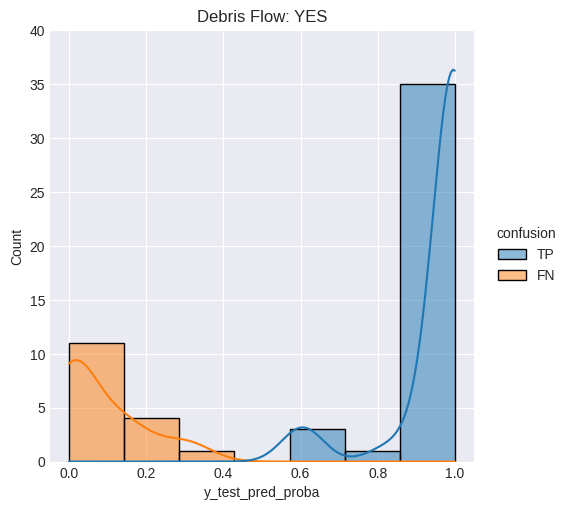

In [646]:
%%time
sns.displot(data=flows, x='y_test_pred_proba', hue='confusion', kde=True);
plt.ylim(0, 40); # to make sure plots are consistent when comparing
plt.title('Debris Flow: YES');

something about the `no_flows` is really slowing up the system
- plot not working (or at least intermittant)
- warning about index being out of bounds
- there must be a really small number in there
    - truncate values?

In [647]:
no_flows.reset_index()

,index,y_test,y_test_pred,pred_correct,y_test_pred_proba,confusion,state
0,2,0,0,True,0.0000000,TN,CA
1,6,0,0,True,0.0000000,TN,CA
2,10,0,0,True,0.0000000,TN,CA
3,36,0,1,False,1.0000000,FP,ID
4,44,0,0,True,0.0000000,TN,CA
...,...,...,...,...,...,...,...
211,1446,0,0,True,0.0000000,TN,AZ
212,1447,0,0,True,0.0045319,TN,AZ
213,1448,0,0,True,0.0000244,TN,AZ
214,1449,0,0,True,0.0000000,TN,AZ


In [648]:
# %%time
# no_flows = no_flows.reset_index()
# sns.displot(data=no_flows, x='y_test_pred_proba', hue='confusion', kde=True);
# #plt.ylim(0, 750); # to make sure plots are consistent when comparing
# plt.title('Debris Flow: NO');

In [649]:
no_flows.shape

(216, 6)

In [650]:
# temp = no_flows.copy().reset_index(drop=True)
# temp['y_test_pred_proba'].astype(str).str[:8].astype(np.float16).astype(str).str.len().value_counts().sort_index()

In [651]:
# temp = no_flows.copy()
# small_mask = temp['y_test_pred_proba'].astype(str).str.len() > 7
# temp.loc[small_mask,'y_test_pred_proba'] = 0.0
# temp

(216, 6)
(178, 6)
CPU times: user 417 ms, sys: 113 ms, total: 530 ms
Wall time: 250 ms


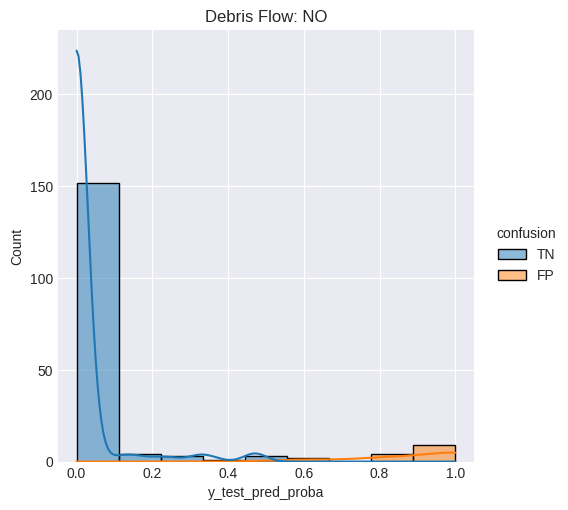

In [652]:
%%time
# this works sometimes???
# temp = no_flows.copy().reset_index(drop=True)
# temp['y_test_pred_proba'] = temp['y_test_pred_proba'].astype(str).str[:6].astype(np.float64)

# this works, but removes records
temp = no_flows[no_flows['y_test_pred_proba'].astype(str).str.len() < 7] # up to 8 in length

# # change the really smalls to zeros
# temp = no_flows.copy()
# small_mask = temp['y_test_pred_proba'].astype(str).str.len() > 7
# temp.loc[small_mask,'y_test_pred_proba'] = 0.0

print(no_flows.shape)
print(temp.shape)

sns.displot(data=temp, x='y_test_pred_proba', hue='confusion', kde=True);
plt.title('Debris Flow: NO');

In [653]:
# this let's us see where are performance is coming from
# it's the percentage of each metric by state
state_matrix = test_assess.groupby(['confusion'])['state'].value_counts(normalize=True).unstack().fillna(0)#.astype(int)
state_matrix = state_matrix.loc[['TP', 'FN', 'TN', 'FP'],:]
state_matrix

state,AZ,CA,CO,ID,MT,NM
confusion,,,,,,
TP,0.0000000,0.8717949,0.0512821,0.0512821,0.0000000,0.0256410
FN,0.1875000,0.4375000,0.1875000,0.0000000,0.1250000,0.0625000
TN,0.1194030,0.5074627,0.3233831,0.0000000,0.0199005,0.0298507
FP,0.2000000,0.4000000,0.2000000,0.0666667,0.1333333,0.0000000


In [654]:
# we can use this to determine
# is our confusion matrix is overindexing on certain state(s)?
state_counts = test_assess['state'].value_counts(normalize=True).sort_index()
state_counts

AZ   0.1107011
CA   0.5498155
CO   0.2693727
ID   0.0110701
MT   0.0295203
NM   0.0295203
Name: state, dtype: float64

In [655]:
confusion_index = state_matrix.div(state_counts) - 1
confusion_index

state,AZ,CA,CO,ID,MT,NM
confusion,,,,,,
TP,-1.0000000,0.5856135,-0.8096242,3.6324786,-1.0000000,-0.1314103
FN,0.6937500,-0.2042785,-0.3039384,-1.0000000,3.2343750,1.1171875
TN,0.0786070,-0.0770310,0.2005043,-1.0000000,-0.3258706,0.0111940
FP,0.8066667,-0.2724832,-0.2575342,5.0222222,3.5166667,-1.0000000


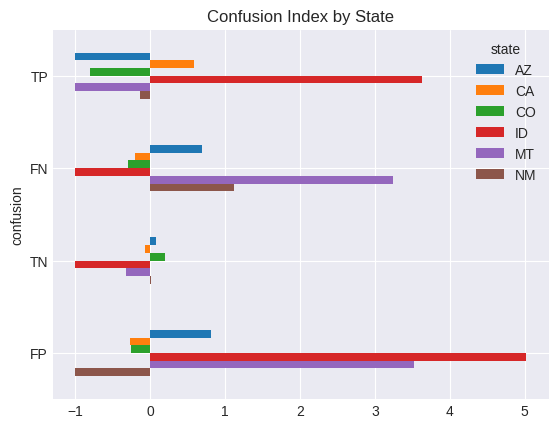

In [656]:
confusion_index.plot(kind='barh').invert_yaxis();
plt.title('Confusion Index by State');

In [658]:
confusion_index

state,AZ,CA,CO,ID,MT,NM
confusion,,,,,,
TP,-1.0000000,0.5856135,-0.8096242,3.6324786,-1.0000000,-0.1314103
FN,0.6937500,-0.2042785,-0.3039384,-1.0000000,3.2343750,1.1171875
TN,0.0786070,-0.0770310,0.2005043,-1.0000000,-0.3258706,0.0111940
FP,0.8066667,-0.2724832,-0.2575342,5.0222222,3.5166667,-1.0000000
